<a href="https://colab.research.google.com/github/GabrielFePL/Regress-o-Linear-e-Funcao-Logistica-Python/blob/main/RegressaoLinearEFuncLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas Básicas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Base de Dados

In [ ]:
np.random.seed(42)
ages = np.random.randint(low=15, high=70, size=40)
ages

array([53, 66, 43, 29, 57, 22, 35, 53, 33, 37, 25, 25, 38, 67, 50, 54, 38,
       17, 36, 67, 16, 38, 58, 44, 52, 16, 35, 47, 26, 36, 58, 39, 63, 41,
       56, 42, 30, 29, 61, 65])

# Declaração de Limites de Classe

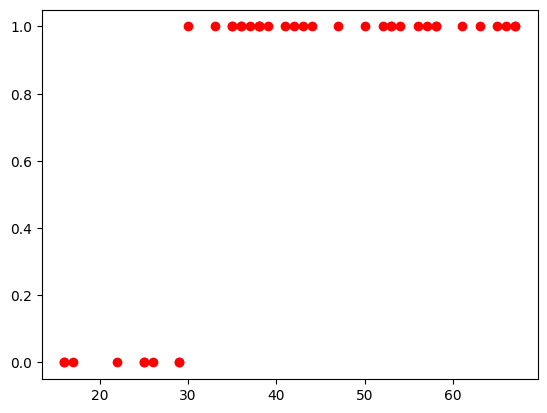

In [ ]:
labels = []
for age in ages:
  if age < 30:
    labels.append(0)
  else:
    labels.append(1)
plt.scatter(ages, labels, color='red')
plt.show()

# Criação de Fator de Aleatoriedade

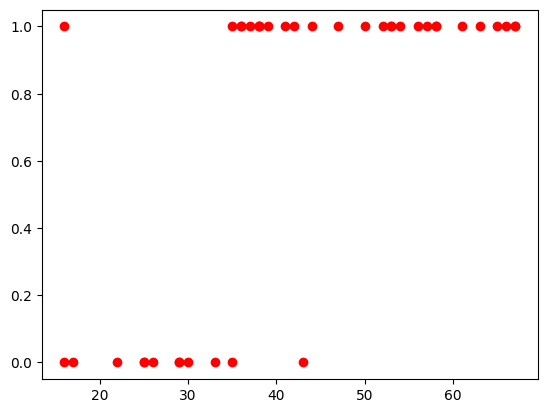

In [ ]:
for i in range(0, 5):
  r = np.random.randint(0, len(labels) - 1)
  if labels[r] == 0:
    labels[r] = 1
  else:
    labels[r] = 0
plt.scatter(ages, labels, color='red')
plt.show()

# Modelo de Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(ages.reshape(-1, 1), labels)

LinearRegression()

## Coeficientes da Reta do Modelo

In [ ]:
m = model.coef_[0]
b = model.intercept_
m, b

(0.020610430074426547, -0.17439749590754627)

# Animação Sobre a Variação do Coeficiente Angular da Reta Conforme o Tempo

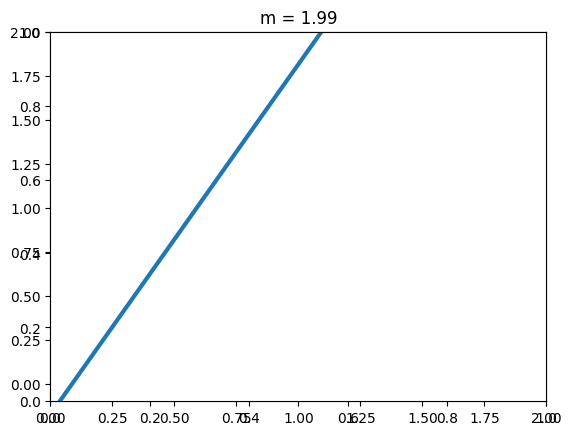

In [ ]:
from matplotlib.animation import FuncAnimation

m = model.coef_[0]
b = model.intercept_

fig, ax = plt.subplots()

# Marking the x-axis and y-axis
axis = plt.axes (xlim = (0, 2), ylim = (-0.1, 2))

# Initializing a line variable
line, = axis.plot([], [], lw = 3)

# Data wich the line will contain (x, y)
def init():
  line.set_data([], [])
  return line,

def animate(i):
  m_copy = i * 0.01
  plt.title('m = ' + str(m_copy))
  x = np.arange(0.0, 10.0, 0.1)
  y = m_copy * x + b
  line.set_data(x, y)
  return line,

ani = FuncAnimation(fig, animate, init_func = init, frames = 200, interval = 20, blit = True)

ani.save('m.mp4', writer = 'ffmpeg', fps = 30)

In [ ]:
from IPython.display import Video

Video('/content/m.mp4', embed=True)

# Animação Sobre a Variação do Coeficiente Linear da Reta Conforme o Tempo

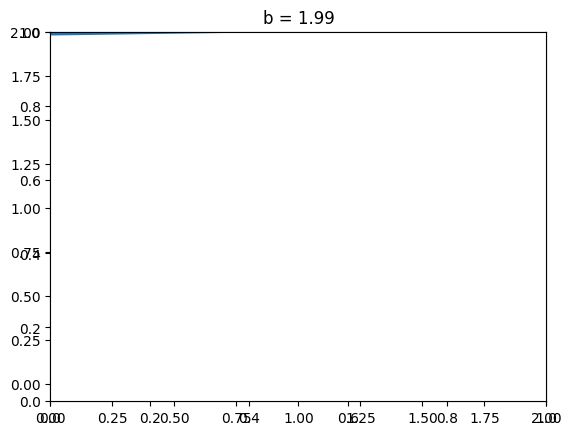

In [ ]:
from matplotlib.animation import FuncAnimation

m = model.coef_[0]
b = model.intercept_

fig, ax = plt.subplots()

# Marking the x-axis and y-axis
axis = plt.axes (xlim = (0, 2), ylim = (-0.1, 2))

# Initializing a line variable
line, = axis.plot([], [], lw = 3)

def animateB(i):
    b_copy = i * 0.01
    plt.title('b = ' + str(b_copy))
    x = np.arange(0.0, 10.0, 0.1)
    y = m * x + b_copy
    line.set_data(x, y)
    return line,

ani = FuncAnimation(fig, animateB, init_func = init, frames = 200, interval = 20, blit = True)

ani.save('b.mp4', writer = 'ffmpeg', fps = 30)

In [ ]:
from IPython.display import Video

Video('/content/b.mp4', embed=True)

# Regressão Linear no Conjunto de Pontos

32.72117532104969


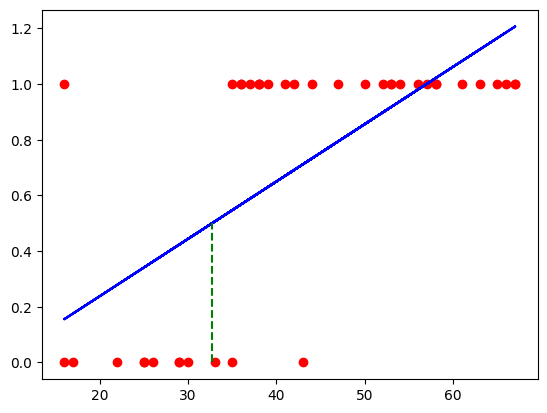

In [ ]:
limiar = (0.5 - b) / m
print(limiar)

plt.plot(ages, ages * m + b, color = 'blue')
plt.plot([limiar, limiar], [0, 0.5], '--', color = 'green')
plt.scatter(ages, labels, color='red')
plt.show()

# Função Logística

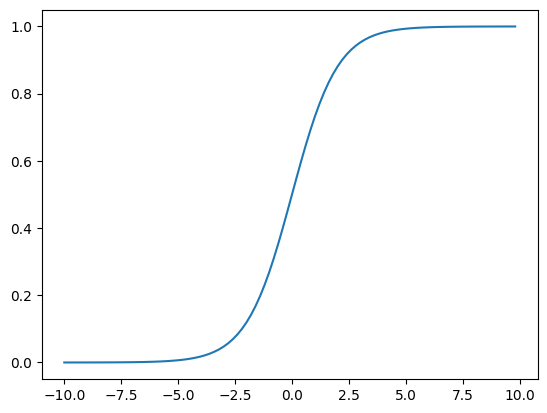

In [ ]:
import math
def sigmoid(x):
  a = []
  for item in x:
    a.append(1 / (1 + math.exp(-item)))
  return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.plot(x, sig)
plt.show()

# Classificador Sigmoide

32.52700425390792


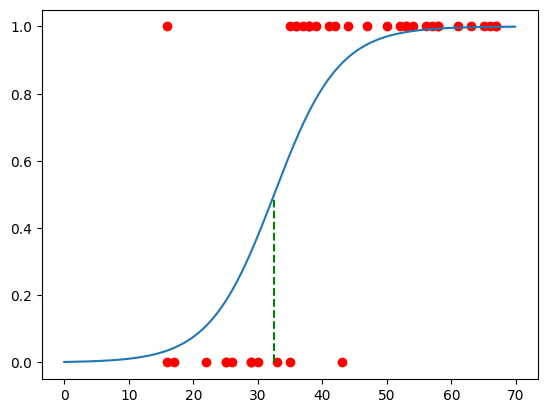

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(ages.reshape(-1, 1), labels)

m = model.coef_[0][0]
b = model.intercept_[0]

x = np.arange(0, 70, 0.1)
sig = sigmoid(m * x + b)

limiar = abs(b / m)
print(limiar)

plt.scatter(ages, labels, color = 'red')
plt.plot([limiar, limiar], [0, 0.5], '--', color = 'green')
plt.plot(x, sig)
plt.show()